In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data into a dataframe
data=pd.read_csv("C:\\Users\\DELL\\DATA SCIENCE\\DS Projects\\P151_Classification Model\\Raw Data\\employee_promotion.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [3]:
data = data.iloc[:,6:]
data.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1,35,5.0,8,0,49.0,0
1,1,30,5.0,4,0,60.0,0
2,1,34,3.0,7,0,50.0,0
3,2,39,1.0,10,0,50.0,0
4,1,45,3.0,2,0,73.0,0


In [4]:
data.drop('age',axis=1,inplace=True)

In [5]:
data.head()

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1,5.0,8,0,49.0,0
1,1,5.0,4,0,60.0,0
2,1,3.0,7,0,50.0,0
3,2,1.0,10,0,50.0,0
4,1,3.0,2,0,73.0,0


In [6]:
# To check column names
data.columns

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# Checking for no. of rows and columns
data.shape

(54808, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   previous_year_rating  50684 non-null  float64
 2   length_of_service     54808 non-null  int64  
 3   awards_won            54808 non-null  int64  
 4   avg_training_score    52248 non-null  float64
 5   is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.5 MB


In [9]:
# Summary statistics
data.describe()

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,1.253011,3.329256,5.865512,0.023172,63.712238,0.085170
std,0.609264,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [10]:
# Checking for datatypes
data.dtypes

no_of_trainings           int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

### missing value treatment

In [11]:
# Checking for missing values
data.isnull().sum()

no_of_trainings            0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [12]:
cols=data.columns
cols

Index(['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

<AxesSubplot:>

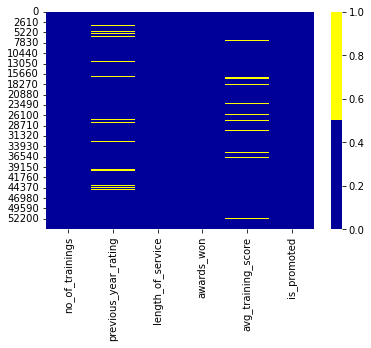

In [13]:
colours=['#000099','#ffff00']
sns.heatmap(data[cols].isnull(),
           cmap=sns.color_palette(colours))

In [14]:
print('The % of data missing values in previous_year_rating is',(4124/54808)*100)
print('The % of data missing values in avg_training_score is',(2560/54808)*100)

The % of data missing values in previous_year_rating is 7.524448985549554
The % of data missing values in avg_training_score is 4.670850970661218


In [15]:
data['previous_year_rating'].skew()

-0.3106378431385327

In [16]:
data_median = data['previous_year_rating'].median()
data_median

3.0

In [17]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data_median)
data['previous_year_rating'].isnull().sum()

0

In [18]:
data['avg_training_score'].skew()

0.4191534330632933

In [19]:
data_mean = data['avg_training_score'].mean()
data_mean

63.71223778900628

In [20]:
data['avg_training_score'] = data['avg_training_score'].fillna(data_mean)
data['avg_training_score'].isnull().sum()

0

In [21]:
data.isnull().sum()

no_of_trainings         0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

### Duplicates

In [22]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54803     True
54804     True
54805     True
54806     True
54807     True
Length: 54808, dtype: bool

In [23]:
data[data.duplicated()]

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
96,1,3.0,1,0,77.000000,0
107,1,3.0,2,0,73.000000,0
114,1,5.0,5,0,49.000000,0
141,1,3.0,1,0,56.000000,0
160,1,3.0,1,0,50.000000,0
...,...,...,...,...,...,...
54803,1,3.0,17,0,78.000000,0
54804,1,2.0,6,0,56.000000,0
54805,1,5.0,3,0,79.000000,0
54806,1,1.0,2,0,63.712238,0


In [22]:
data = data.drop_duplicates()

In [24]:
data[data.duplicated()]

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
96,1,3.0,1,0,77.000000,0
107,1,3.0,2,0,73.000000,0
114,1,5.0,5,0,49.000000,0
141,1,3.0,1,0,56.000000,0
160,1,3.0,1,0,50.000000,0
...,...,...,...,...,...,...
54803,1,3.0,17,0,78.000000,0
54804,1,2.0,6,0,56.000000,0
54805,1,5.0,3,0,79.000000,0
54806,1,1.0,2,0,63.712238,0


## Visualization

### Univariate Analysis

### Numerical feature distribution

<AxesSubplot:>

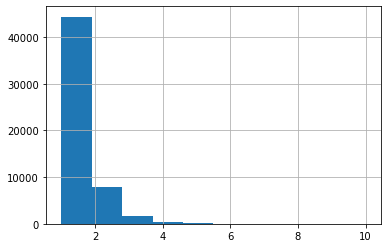

In [25]:
data['no_of_trainings'].hist()

<AxesSubplot:>

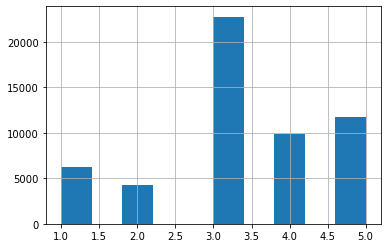

In [27]:
data['previous_year_rating'].hist()

<AxesSubplot:>

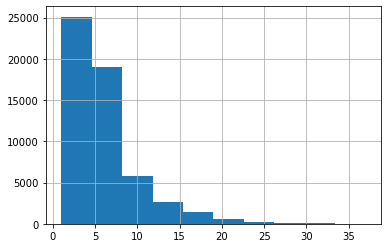

In [28]:
data['length_of_service'].hist()

<AxesSubplot:>

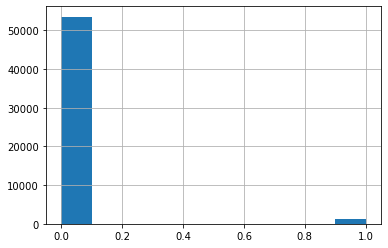

In [29]:
data['awards_won'].hist()

<AxesSubplot:>

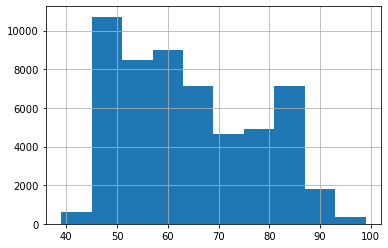

In [30]:
data['avg_training_score'].hist()

### Countplot for is_promoted

0    50140
1     4668
Name: is_promoted, dtype: int64


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

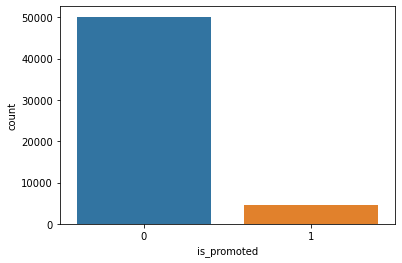

In [31]:
print(data['is_promoted'].value_counts())
sns.countplot(x=data['is_promoted'])

In [32]:
# scatter plot

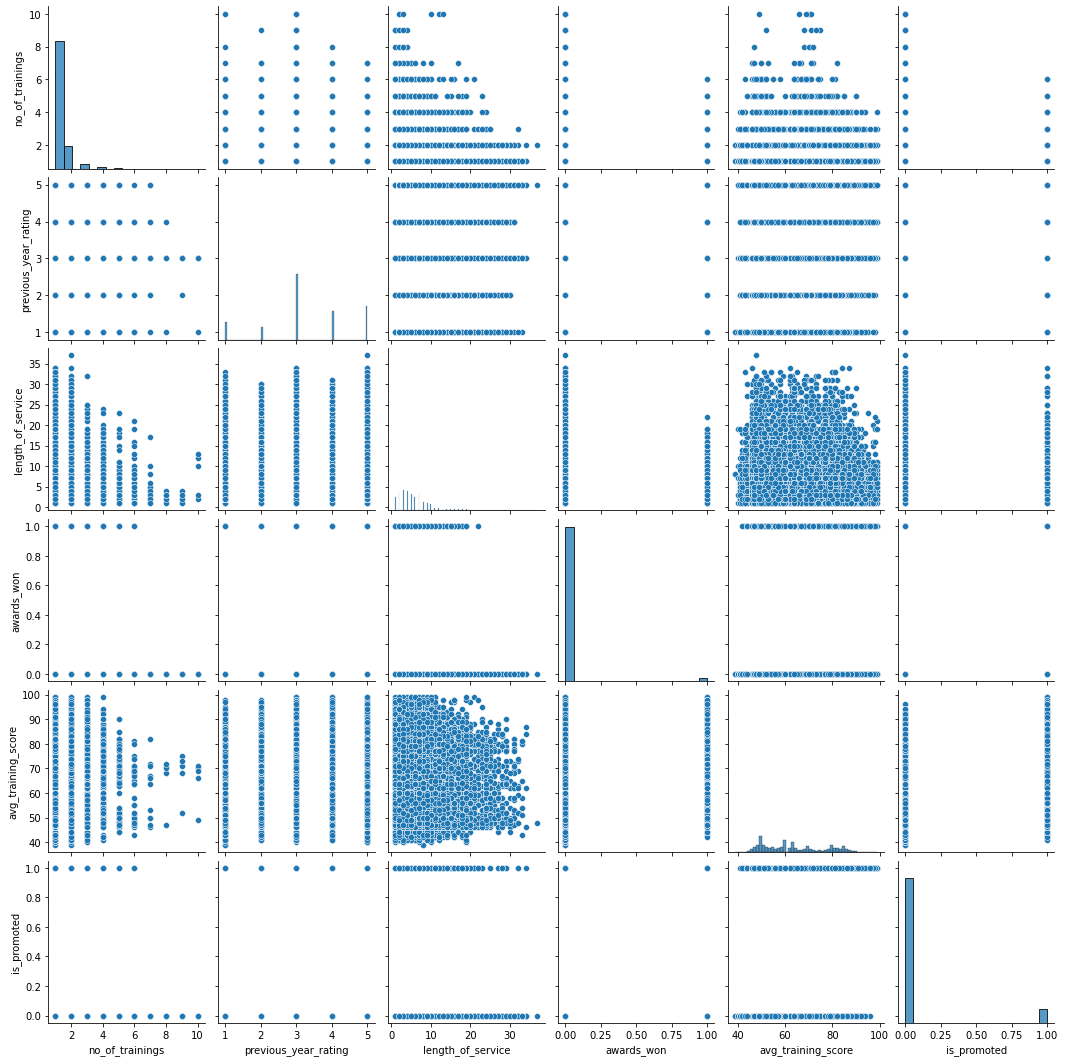

In [33]:
sns.pairplot(data)

In [34]:
data.corr()

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.061564,-0.057275,-0.007628,0.043549,-0.024896
previous_year_rating,-0.061564,1.000000,0.023504,0.026587,0.070540,0.153230
length_of_service,-0.057275,0.023504,1.000000,-0.039927,-0.038430,-0.010670
awards_won,-0.007628,0.026587,-0.039927,1.000000,0.072689,0.195871
avg_training_score,0.043549,0.070540,-0.038430,0.072689,1.000000,0.180779
is_promoted,-0.024896,0.153230,-0.010670,0.195871,0.180779,1.000000


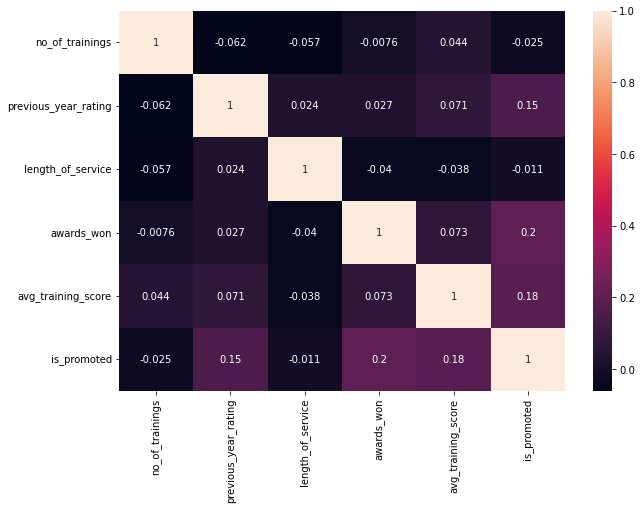

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Dividing data in X and Y

In [36]:
# Splitting the independent and dependent variables
X = data.drop(columns="is_promoted",axis=1)
Y = data.is_promoted
X.shape,Y.shape

((54808, 5), (54808,))

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# standardization 
std_scaler = StandardScaler()
X_scaler = std_scaler.fit_transform(X) 
print(X_scaler)

[[-4.15276153e-01  1.39576589e+00  5.00459556e-01 -1.54017755e-01
  -1.11437663e+00]
 [-4.15276153e-01  1.39576589e+00 -4.37394645e-01 -1.54017755e-01
  -2.81182991e-01]
 [-4.15276153e-01 -2.50651485e-01  2.65996006e-01 -1.54017755e-01
  -1.03863175e+00]
 ...
 [-4.15276153e-01  1.39576589e+00 -6.71858195e-01 -1.54017755e-01
   1.15796965e+00]
 [-4.15276153e-01 -1.89706886e+00 -9.06321745e-01 -1.54017755e-01
   5.38199714e-16]
 [-4.15276153e-01 -1.89706886e+00 -2.02931094e-01 -1.54017755e-01
  -1.11437663e+00]]


In [39]:
#Spliting the variable into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler,Y, test_size=0.20, random_state=40)


## MODEL BUILDING

## 1. RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_jobs=2, random_state=40)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=40)

### Validation of model


In [41]:
y_pred_rfc_train= rfc_model.predict(X_train)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_rfc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_rfc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_rfc_train))

Accuracy of training model 0.9343611731970989
Confusion Matrics [[39920   139]
 [ 2739  1048]]
Classificaton Report                precision    recall  f1-score   support

           0       0.94      1.00      0.97     40059
           1       0.88      0.28      0.42      3787

    accuracy                           0.93     43846
   macro avg       0.91      0.64      0.69     43846
weighted avg       0.93      0.93      0.92     43846



In [44]:
y_pred_rfc_test= rfc_model.predict(X_test)

In [45]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_rfc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_rfc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_rfc_test))

Accuracy of testing model 0.9192665571975916
Confusion Matrics [[9946  135]
 [ 750  131]]
Classificaton Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10081
           1       0.49      0.15      0.23       881

    accuracy                           0.92     10962
   macro avg       0.71      0.57      0.59     10962
weighted avg       0.89      0.92      0.90     10962



## 2. LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

### Validation of model

In [47]:
y_pred_lr_train=lr_model.predict(X_train)

In [48]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_lr_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_lr_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_lr_train))

Accuracy of training model 0.9177119919719017
Confusion Matrics [[39940   119]
 [ 3489   298]]
Classificaton Report                precision    recall  f1-score   support

           0       0.92      1.00      0.96     40059
           1       0.71      0.08      0.14      3787

    accuracy                           0.92     43846
   macro avg       0.82      0.54      0.55     43846
weighted avg       0.90      0.92      0.89     43846



In [49]:
y_pred_lr_test= lr_model.predict(X_test)

In [50]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_lr_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_lr_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_lr_test))

Accuracy of testing model 0.9226418536763364
Confusion Matrics [[10049    32]
 [  816    65]]
Classificaton Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10081
           1       0.67      0.07      0.13       881

    accuracy                           0.92     10962
   macro avg       0.80      0.54      0.55     10962
weighted avg       0.90      0.92      0.89     10962



## 3. GAUSSIAN NAIVE BAYES CLASSIFIER

In [51]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_model= GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

### Validation of model

In [52]:
y_pred_gnb_train=gnb_model.predict(X_train)

In [53]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gnb_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_gnb_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_gnb_train))

Accuracy of training model 0.9111891620672353
Confusion Matrics [[39494   565]
 [ 3329   458]]
Classificaton Report                precision    recall  f1-score   support

           0       0.92      0.99      0.95     40059
           1       0.45      0.12      0.19      3787

    accuracy                           0.91     43846
   macro avg       0.68      0.55      0.57     43846
weighted avg       0.88      0.91      0.89     43846



In [54]:
y_pred_gnb_test = gnb_model.predict(X_test)

In [55]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gnb_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_gnb_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_gnb_test))

Accuracy of testing model 0.9155263638022259
Confusion Matrics [[9935  146]
 [ 780  101]]
Classificaton Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10081
           1       0.41      0.11      0.18       881

    accuracy                           0.92     10962
   macro avg       0.67      0.55      0.57     10962
weighted avg       0.89      0.92      0.89     10962



## 4. SUPPORT VECTOR MACHINE

In [56]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

### Validation of model

In [57]:
y_pred_svc_train=svc_model.predict(X_train)

In [58]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_svc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_svc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_svc_train))

Accuracy of training model 0.913629521507093
Confusion Matrics [[40059     0]
 [ 3787     0]]
Classificaton Report                precision    recall  f1-score   support

           0       0.91      1.00      0.95     40059
           1       0.00      0.00      0.00      3787

    accuracy                           0.91     43846
   macro avg       0.46      0.50      0.48     43846
weighted avg       0.83      0.91      0.87     43846



In [59]:
y_pred_svc_test = svc_model.predict(X_test)

In [60]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_svc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_svc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_svc_test))

Accuracy of testing model 0.9196314541142128
Confusion Matrics [[10081     0]
 [  881     0]]
Classificaton Report               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10081
           1       0.00      0.00      0.00       881

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.85      0.92      0.88     10962



## 5. XGBOOST CLASSIFIER

In [61]:
!pip install xgboost

In [62]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Validation of model

In [63]:
y_pred_xgb_train=xgb_model.predict(X_train)

In [64]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_xgb_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_xgb_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_xgb_train))

Accuracy of training model 0.9259225470966564
Confusion Matrics [[39960    99]
 [ 3149   638]]
Classificaton Report                precision    recall  f1-score   support

           0       0.93      1.00      0.96     40059
           1       0.87      0.17      0.28      3787

    accuracy                           0.93     43846
   macro avg       0.90      0.58      0.62     43846
weighted avg       0.92      0.93      0.90     43846



In [65]:
y_pred_xgb_test = xgb_model.predict(X_test)

## 6. DECISION TREE

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier(criterion = 'entropy')
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Validation of model

In [67]:
y_pred_dtc_train = dtc_model.predict(X_train)

In [68]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_dtc_train))

Accuracy of training model 0.9343611731970989
Confusion Matrics [[40014    45]
 [ 2833   954]]
Classificaton Report                precision    recall  f1-score   support

           0       0.93      1.00      0.97     40059
           1       0.95      0.25      0.40      3787

    accuracy                           0.93     43846
   macro avg       0.94      0.63      0.68     43846
weighted avg       0.94      0.93      0.92     43846



In [69]:
y_pred_dtc_test = dtc_model.predict(X_test)

In [70]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_dtc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_dtc_train))

Accuracy of training model 0.9343611731970989
Confusion Matrics [[40014    45]
 [ 2833   954]]
Classificaton Report                precision    recall  f1-score   support

           0       0.93      1.00      0.97     40059
           1       0.95      0.25      0.40      3787

    accuracy                           0.93     43846
   macro avg       0.94      0.63      0.68     43846
weighted avg       0.94      0.93      0.92     43846



In [71]:
y_pred_knn_test = dtc_model.predict(X_test)

In [72]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_dtc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_dtc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_dtc_test))

Accuracy of testing model 0.9195402298850575
Confusion Matrics [[9954  127]
 [ 755  126]]
Classificaton Report               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10081
           1       0.50      0.14      0.22       881

    accuracy                           0.92     10962
   macro avg       0.71      0.57      0.59     10962
weighted avg       0.89      0.92      0.90     10962



# 7 KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Validation of model

In [74]:
y_pred_knn_train = knn_model.predict(X_train)

In [75]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_knn_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_knn_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_knn_train))

Accuracy of training model 0.9177347990694704
Confusion Matrics [[39265   794]
 [ 2813   974]]
Classificaton Report                precision    recall  f1-score   support

           0       0.93      0.98      0.96     40059
           1       0.55      0.26      0.35      3787

    accuracy                           0.92     43846
   macro avg       0.74      0.62      0.65     43846
weighted avg       0.90      0.92      0.90     43846



In [76]:
y_pred_knn_test = knn_model.predict(X_test)

In [77]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_knn_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_knn_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_knn_test))

Accuracy of testing model 0.9084108739281153
Confusion Matrics [[9807  274]
 [ 730  151]]
Classificaton Report               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10081
           1       0.36      0.17      0.23       881

    accuracy                           0.91     10962
   macro avg       0.64      0.57      0.59     10962
weighted avg       0.88      0.91      0.89     10962



In [78]:
#Spliting the variable into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler,Y, test_size=0.20, random_state=2903)

# 8. GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                       learning_rate=0.1, loss='deviance', max_depth=3,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, n_estimators=100,
                                       n_iter_no_change=None,
                                       random_state=2903, subsample=1.0, tol=0.0001,
                                       validation_fraction=0.1, verbose=0,
                                       warm_start=False)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=2903)

### Validation of model

In [80]:
y_pred_gbc_train= gbc_model.predict(X_train)

In [81]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gbc_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_gbc_train))
print("==============================================================================")
print("Classificaton Report ",classification_report(y_train,y_pred_gbc_train))

Accuracy of training model 0.9248049993157871
Confusion Matrics [[39999   102]
 [ 3195   550]]
Classificaton Report                precision    recall  f1-score   support

           0       0.93      1.00      0.96     40101
           1       0.84      0.15      0.25      3745

    accuracy                           0.92     43846
   macro avg       0.88      0.57      0.61     43846
weighted avg       0.92      0.92      0.90     43846



In [82]:
y_pred_gbc_test= gbc_model.predict(X_test)

In [83]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gbc_test))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_test,y_pred_gbc_test))
print("==============================================================================")
print("Classificaton Report",classification_report(y_test,y_pred_gbc_test))

Accuracy of testing model 0.9261083743842364
Confusion Matrics [[10003    36]
 [  774   149]]
Classificaton Report               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10039
           1       0.81      0.16      0.27       923

    accuracy                           0.93     10962
   macro avg       0.87      0.58      0.62     10962
weighted avg       0.92      0.93      0.90     10962



## Accuracy comparision

In [84]:
model = ['RANDOM FOREST','LOGISTIC REGRESSION','GAUSSIAN NAIVE BAYES CLASSIFIER','SVC','XGB','DECISION TREE','KNN','GradientBoostingClassifier']

training = [
     (accuracy_score(y_train,y_pred_rfc_train)*100),
     (accuracy_score(y_train,y_pred_lr_train)*100),
     (accuracy_score(y_train,y_pred_gnb_train)*100),
     (accuracy_score(y_train,y_pred_svc_train)*100),
     (accuracy_score(y_train,y_pred_xgb_train)*100),
     (accuracy_score(y_train,y_pred_dtc_train)*100),
     (accuracy_score(y_train,y_pred_knn_train)*100),
     (accuracy_score(y_train,y_pred_gbc_train)*100)
]

testing = [
     (accuracy_score(y_test,y_pred_rfc_test)*100),
     (accuracy_score(y_test,y_pred_lr_test)*100),
     (accuracy_score(y_test,y_pred_gnb_test)*100),
     (accuracy_score(y_test,y_pred_svc_test)*100),
     (accuracy_score(y_test,y_pred_xgb_test)*100),
     (accuracy_score(y_test,y_pred_dtc_test)*100),
     (accuracy_score(y_test,y_pred_knn_test)*100),
     (accuracy_score(y_test,y_pred_gbc_test)*100)
]

In [85]:
df = pd.DataFrame()
df['Model'] = model
df['Training'] = training
df['Testing'] = testing
df

,Model,Training,Testing
0,RANDOM FOREST,89.212243,89.719029
1,LOGISTIC REGRESSION,90.685581,90.895822
2,GAUSSIAN NAIVE BAYES CLASSIFIER,89.599964,89.801131
3,SVC,91.458742,91.580004
4,XGB,90.078913,90.302864
5,DECISION TREE,89.581718,89.746397
6,KNN,88.096976,88.487502
7,GradientBoostingClassifier,92.480500,92.610837


In [86]:
import pickle

In [87]:
# open a file, where you ant to store the data
file = open('gbc_model_pickle','wb')

# dump information to that file
pickle.dump(gbc_model,file)